In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sn

### **Loading MNIST Data**

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
X = np.concatenate([x_train, x_test])
Y = np.concatenate([y_train, y_test])

11490434/11490434 [==============================] - 0s 0us/step


### **Figure**

![picture](https://drive.google.com/uc?id=19td5m2flfSrHW39oUQSgbHKOtI_UeOj0)

### **Functions**

In [14]:
def fit2LModel(xTrainFlat, yTrainFlat, activation1, activation2, e):
  model =  keras.Sequential([
      keras.layers.Dense(100, input_shape = (28*28,), activation = activation1),
      keras.layers.Dense(10, activation = activation2)
  ])

  model.compile(
      optimizer='adam', #learning rate is automatically adapted
      loss='sparse_categorical_crossentropy', #best suited when we have to identify the input object into one of the two or multiple classes
      metrics=['accuracy']
  )
  
  #Min-Max Normalizing for better accuracy
  xTrainFlatNorm = xTrainFlat/255

  history = model.fit(xTrainFlatNorm, yTrainFlat, epochs = e)
  print(history)

  return model

In [15]:
def fit3LModel(xTrainFlat, yTrainFlat, activation1, activation2, activation3, e):
  model =  keras.Sequential([
      keras.layers.Dense(100, input_shape = (28*28,), activation = activation1),
      keras.layers.Dense(50, activation = activation2),
      keras.layers.Dense(10, activation = activation3)
  ])

  model.compile(
      optimizer='adam', #learning rate is automatically adapted
      loss='sparse_categorical_crossentropy', #best suited when we have to identify the input object into one of the two or multiple classes
      metrics=['accuracy']
  )
  
  #Min-Max Normalizing for better accuracy
  xTrainFlatNorm = xTrainFlat/255

  history = model.fit(xTrainFlatNorm, yTrainFlat, epochs = e)
  print(history)

  return model

In [18]:
def printConfusionMatrix(xTestFlat, yTest, af1, af2, af3='none'):
  xTestFlatNorm = xTestFlat/255
  yPredicted = model.predict(xTestFlatNorm)

  yPredictedLabels = [np.argmax(i) for i in yPredicted]

  cm = tf.math.confusion_matrix(labels=yTest, predictions=yPredictedLabels)

  plt.figure(figsize = (10,7))
  if af3 == 'none':
    plt.title(f'2 Layer [{af1}, {af2}]')
  else:
    plt.title(f'3 Layer [{af1}, {af2}, {af3}]')
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

## **2 Layers**

|-----Training-----|

Layer 1: tanh
Layer 2: sigmoid

Epoch 1/5
1466/1466 [==============================] - 6s 4ms/step - loss: 0.3237 - accuracy: 0.9086
Epoch 2/5
1466/1466 [==============================] - 9s 6ms/step - loss: 0.1659 - accuracy: 0.9516
Epoch 3/5
1466/1466 [==============================] - 8s 6ms/step - loss: 0.1170 - accuracy: 0.9658
Epoch 4/5
1466/1466 [==============================] - 11s 7ms/step - loss: 0.0887 - accuracy: 0.9736
Epoch 5/5
1466/1466 [==============================] - 9s 6ms/step - loss: 0.0693 - accuracy: 0.9800

|-----Testing-----|

722/722 [==============================] - 3s 3ms/step - loss: 0.1210 - accuracy: 0.9653
Accuracy: 0.9653246998786926

|-----Confusion Matrix-----|



722/722 [==============================] - 3s 4ms/step
|-----Training-----|

Layer 1: tanh
Layer 2: relu

Epoch 1/5
1466/1466 [==============================] - 8s 5ms/step - loss: 2.3498 - accuracy: 0.1013
Epoch 2/5
1466/1466 [==============================] - 6s 4m

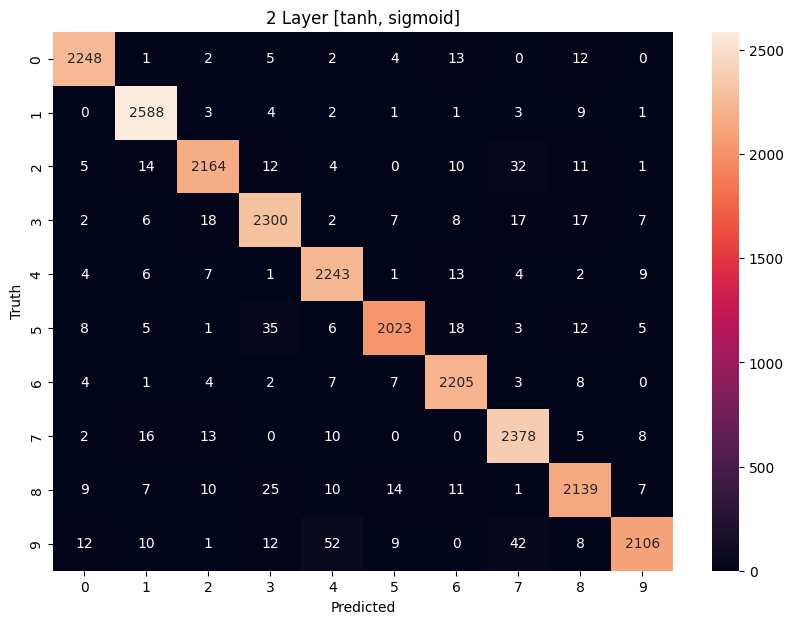

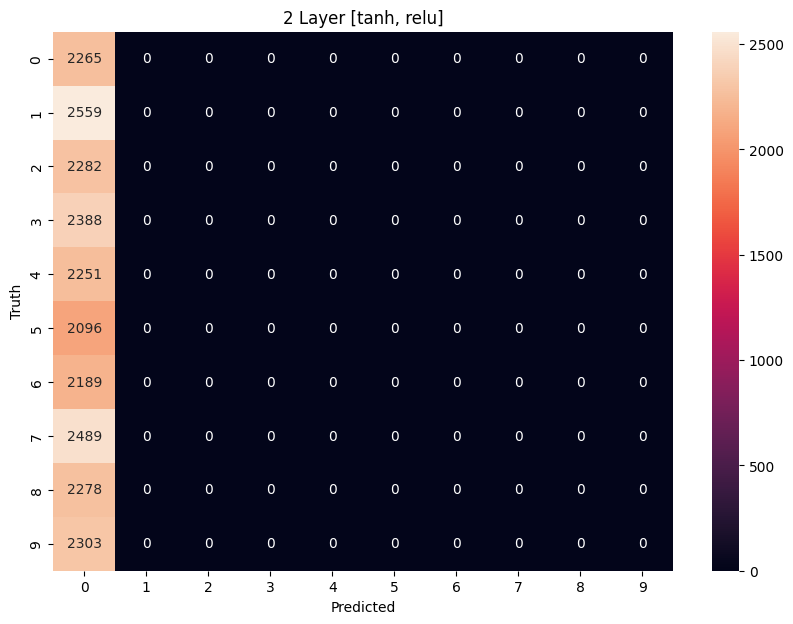

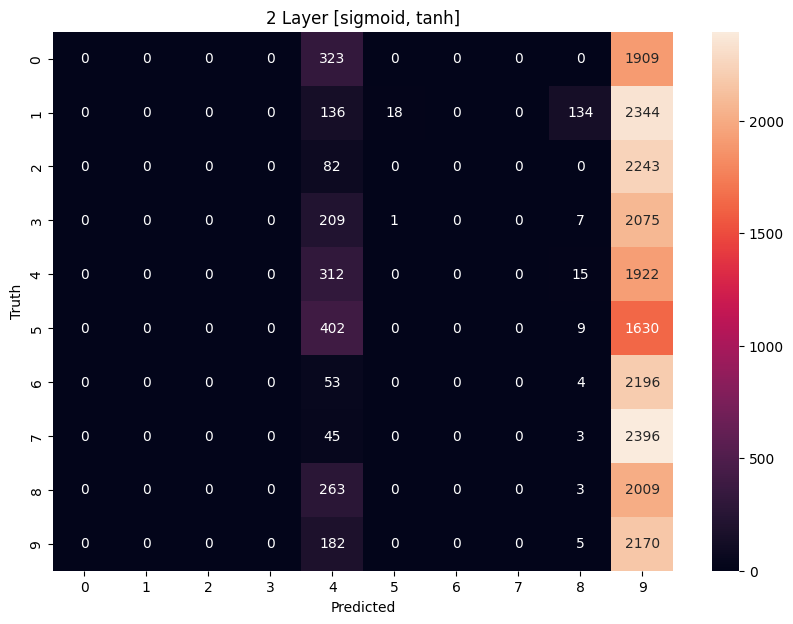

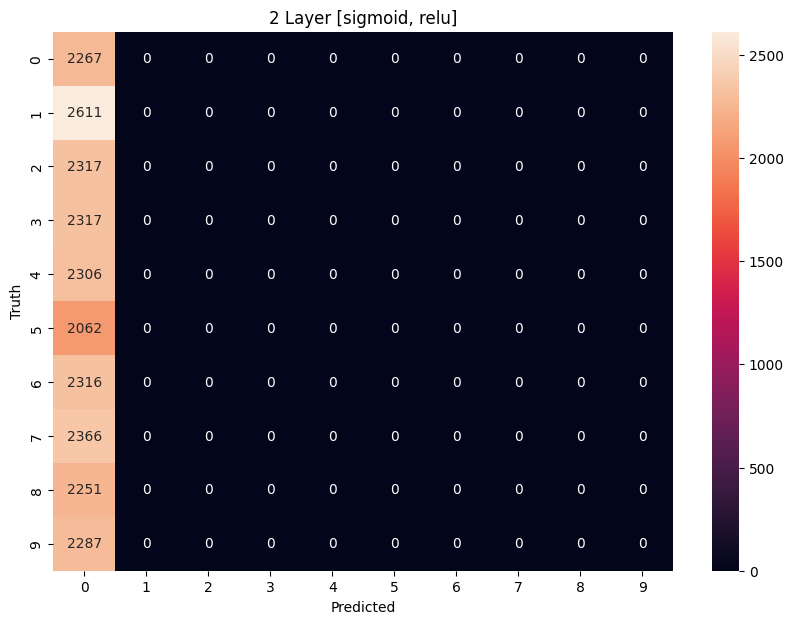

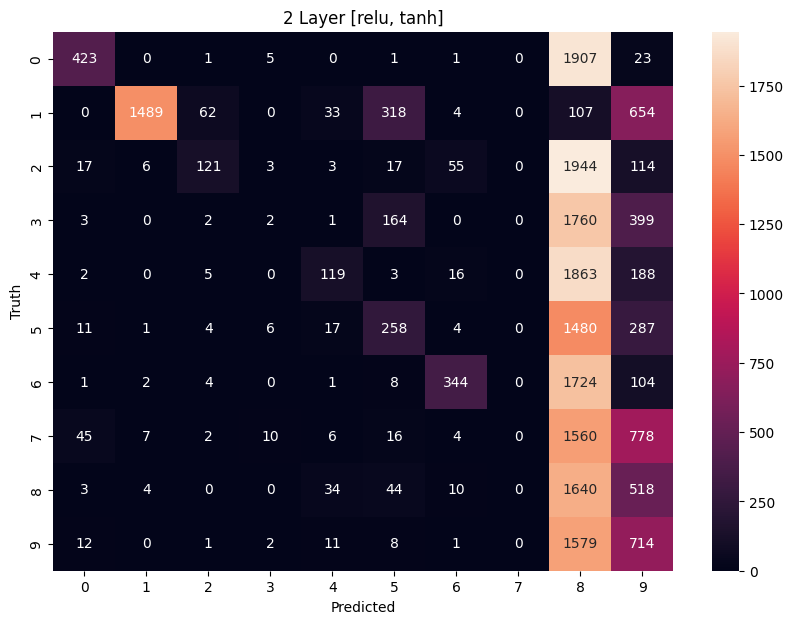

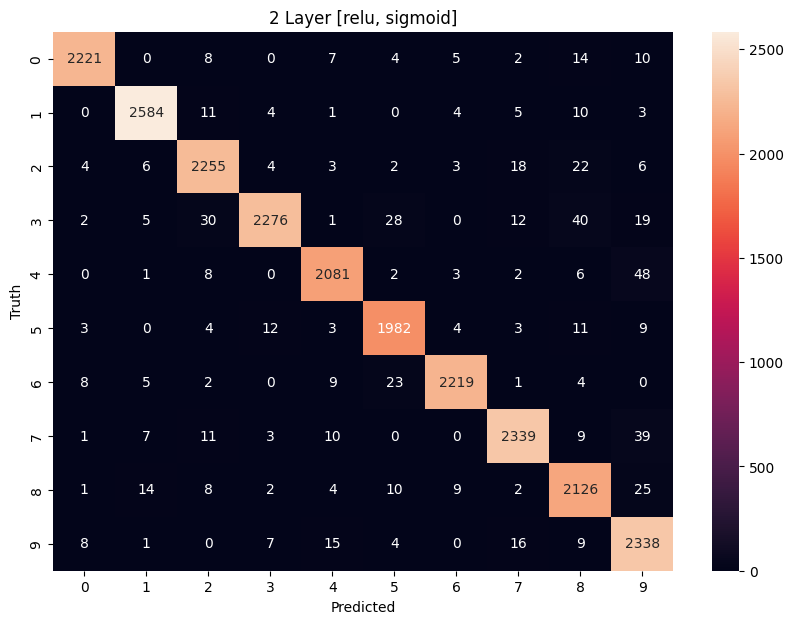

In [21]:

activation_functions = ['tanh', 'sigmoid', 'relu']
for i in range(3):
  for j in range(3):

    if i == j: 
      continue

    af1 = activation_functions[i]
    af2 = activation_functions[j]

    xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.33, shuffle=True)

    #Train
    print('|-----Training-----|\n')
    print(f'Layer 1: {af1}\nLayer 2: {af2}\n')
    xTrainFlat = xTrain.reshape(len(xTrain), 28*28)
    model = fit2LModel(xTrainFlat, yTrain, af1, af2, 5)

    #Evaluate
    print('\n|-----Testing-----|\n')
    xTestFlat = xTest.reshape(len(xTest), 28*28)
    loss, accuracy = model.evaluate(xTestFlat, yTest)
    print(f'Accuracy: {accuracy}')

    #Confusion Matrix
    print('\n|-----Confusion Matrix-----|\n\n\n')
    printConfusionMatrix(xTestFlat, yTest, af1, af2)



### **3 Layers**

|-----Training-----|

Layer 1: tanh
Layer 2: sigmoid
Layer 3: relu

Epoch 1/5
1466/1466 [==============================] - 8s 5ms/step - loss: 2.3160 - accuracy: 0.1349
Epoch 2/5
1466/1466 [==============================] - 6s 4ms/step - loss: 2.3019 - accuracy: 0.0990
Epoch 3/5
1466/1466 [==============================] - 7s 5ms/step - loss: 2.3000 - accuracy: 0.0999
Epoch 4/5
1466/1466 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.0989
Epoch 5/5
1466/1466 [==============================] - 7s 5ms/step - loss: 2.3025 - accuracy: 0.0988

|-----Testing-----|

722/722 [==============================] - 3s 4ms/step - loss: 2.3026 - accuracy: 0.0984

|-----Confusion Matrix-----|



722/722 [==============================] - 2s 2ms/step
|-----Training-----|

Layer 1: tanh
Layer 2: relu
Layer 3: sigmoid

Epoch 1/5
1466/1466 [==============================] - 8s 5ms/step - loss: 0.2896 - accuracy: 0.9152
Epoch 2/5
1466/1466 [==============================] - 6s 4

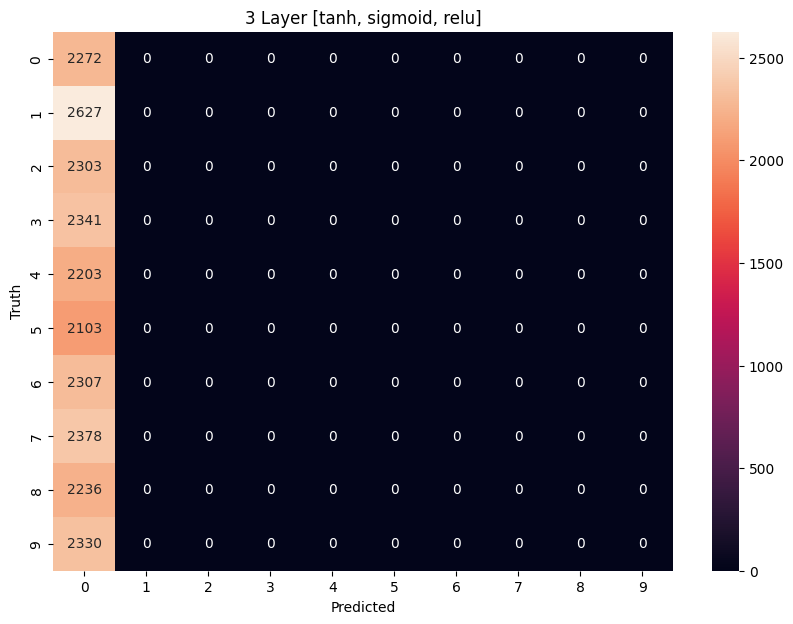

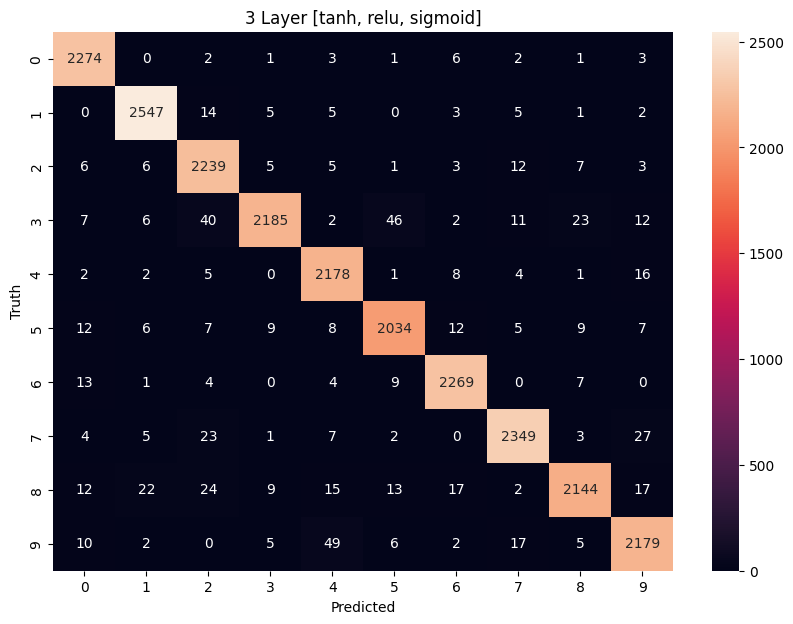

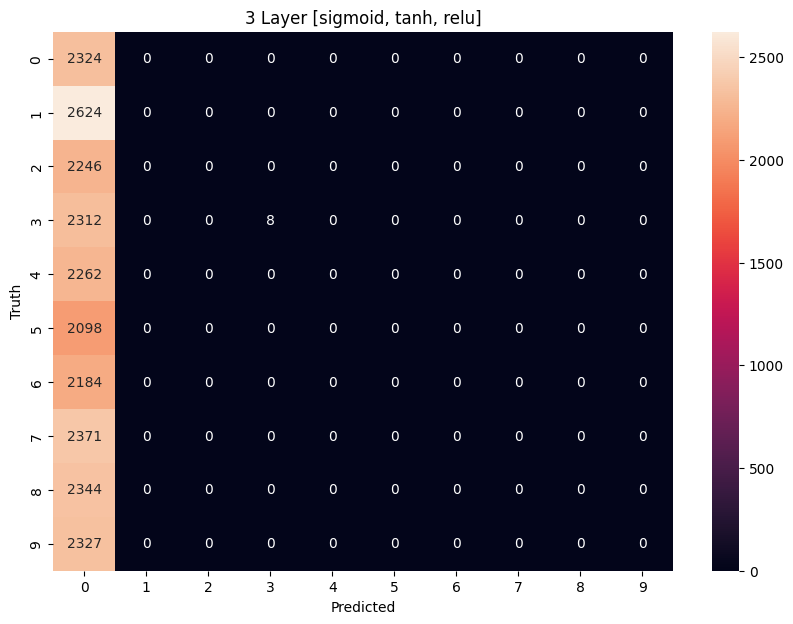

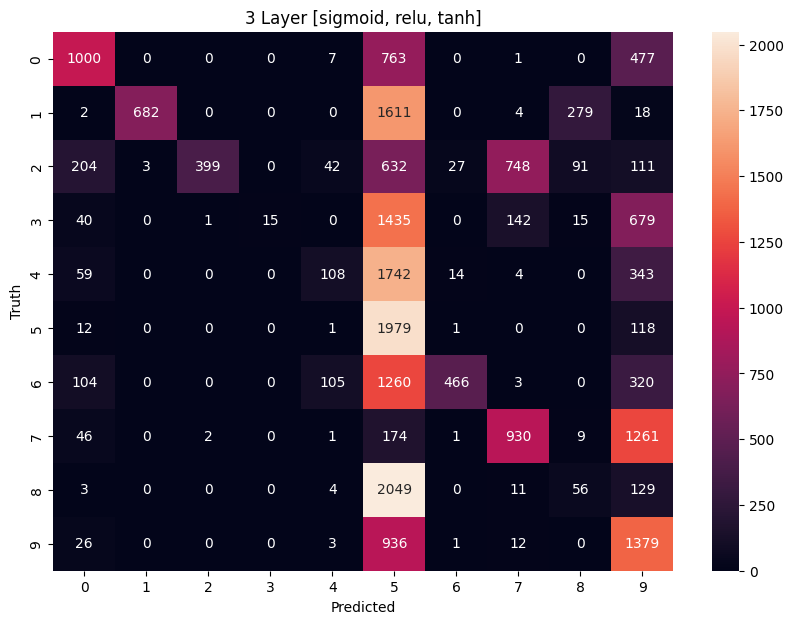

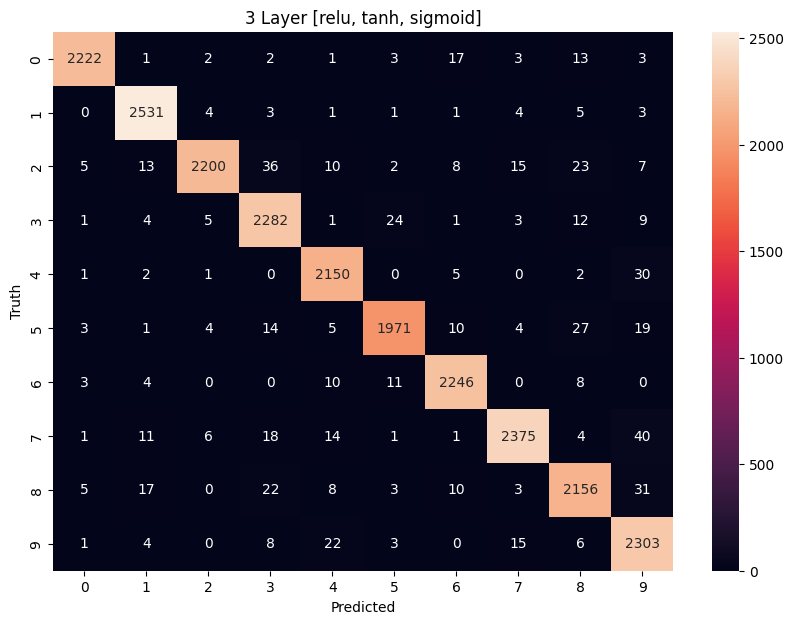

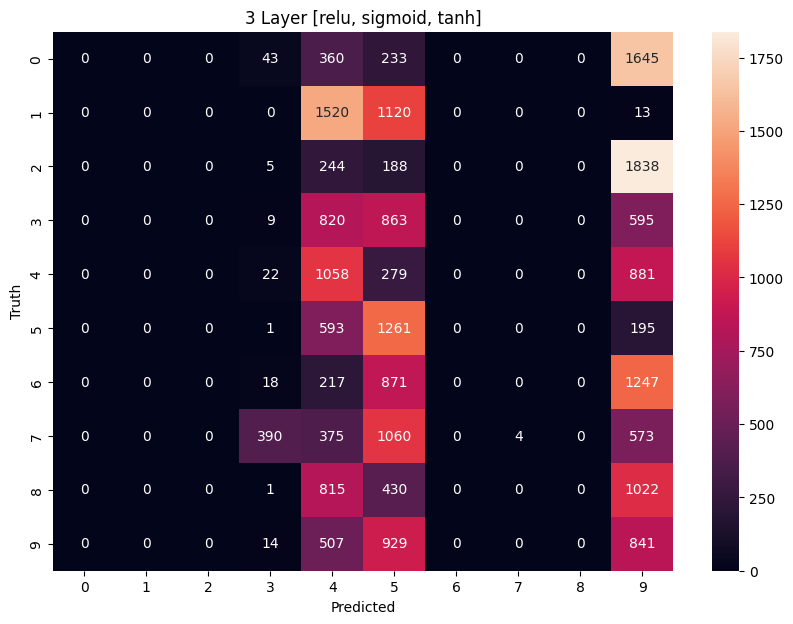

In [22]:
activation_functions = ['tanh', 'sigmoid', 'relu']
for i in range(3):
  for j in range(3):
    for k in range(3):
      if (i == j or j == k or i == k):
        continue

      af1 = activation_functions[i]
      af2 = activation_functions[j]
      af3 = activation_functions[k]

      xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.33, shuffle=True)

      #Train
      print('|-----Training-----|\n')
      print(f'Layer 1: {af1}\nLayer 2: {af2}\nLayer 3: {af3}\n')
      xTrainFlat = xTrain.reshape(len(xTrain), 28*28)
      model = fit3LModel(xTrainFlat, yTrain, af1, af2, af3, 5)

      #Evaluate
      print('\n|-----Testing-----|\n')
      xTestFlat = xTest.reshape(len(xTest), 28*28)
      model.evaluate(xTestFlat, yTest)

      #Confusion Matrix
      print('\n|-----Confusion Matrix-----|\n\n\n')
      printConfusionMatrix(xTestFlat, yTest, af1, af2, af3)